Use the Table or dictionary that you created in the previous session and plot the spectral energy distribution (SED: flux as a function of wavelength). The wavelength corresponding to the different bands are (in um):
0.3543, 0.4770, 0.6231, 0.7625, 0.9134, 1.0305, 1.2483, 1.6313, 2.2010, 3.4, 4.6, 12., 22.

In [36]:
import astropy as astro
import numpy as np
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline 

In [37]:
fluxes = Table.read('Fluxes.fits')
sel = fluxes[:3]

In [38]:
fluxes.colnames # Seeing Column Names

['id',
 'ra',
 'dec',
 'redshift',
 'u',
 'u_err',
 'g',
 'g_err',
 'r',
 'r_err',
 'i',
 'i_err',
 'z',
 'z_err',
 'J',
 'J_err',
 'Y',
 'Y_err',
 'H',
 'H_err',
 'K',
 'K_err',
 'W1',
 'W1_err',
 'W2',
 'W2_err',
 'W3',
 'W3_err',
 'W4',
 'W4_err']

In [39]:
# Creating a Numpy Array from Astropy Table 
# (Columns in Astropy tables are not ordered)

colnames = ('u', 'g', 'r', 'i', 'z', 'Y', 
            'J', 'H', 'K', 'W1', 'W2', 'W3', 'W4')
colnames_err = ('u_err', 'g_err', 'r_err', 'i_err', 'z_err', 'Y_err', 
            'J_err', 'H_err', 'K_err', 'W1_err', 'W2_err', 'W3_err', 'W4_err')

n_cols = len(colnames)
sel_gals = np.zeros((3, n_cols))
sel_gals_err = np.zeros((3, n_cols))

for j in range(3):
    for i in range(n_cols):
        tmp_col = colnames[i]
        tmp_colerr = colnames_err[i]
        sel_gals[j, i] = fluxes[j][tmp_col]
        sel_gals_err[j, i] = fluxes[j][tmp_colerr]


In [40]:
mu = np.array([0.3543, 0.4770, 0.6231, 0.7625, 
               0.9134, 1.0305, 1.2483, 1.6313, 
               2.2010, 3.40, 4.60, 12.00, 22.00])

5.Use these specific instructions.
a. Plot the SED for the first three objects in one plot.
b. X-axis and Y-axis should be logarithmic.
c. Plot first object with dashed lines in green.
d. Plot second object with filled circles in blue, connected by no line.
e. Plot third object with delta symbols in red, connected by a solid
line.
f. Indicate the uncertainties in the fluxes with error bars.
g. Add axes labels.
h. Add a legend in the lower right corner showing which color/style
corresponds to which object.
i. For sources with no data at a certain wavelength, indicate these
missing data with downward arrows (upper limits) using 1e2 as an
upper limit.
j. Save your plot as jpg file.

In [41]:
# Finding mask on bad galaxies
idx1 = np.where(sel_gals[1,:] != 0)
idx = np.where(sel_gals[1,:] == 0)

temp_data = np.ones(idx[0].size) * 1E2

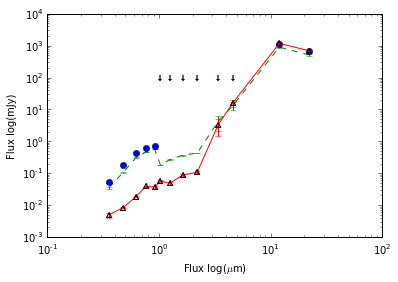

In [42]:
arrow = u'$\u2193$'

plt.errorbar(mu,sel_gals[0,:], yerr=sel_gals_err[0,:], 
             color= 'green',linestyle = 'dashed')

plt.errorbar(mu[idx1],sel_gals[1, :][idx1], 
             yerr=sel_gals_err[1,:][idx1], 
             color= 'blue',marker ='o',
             linestyle = 'none')

plt.plot(mu[idx],temp_data, 
         color = 'blue', marker = arrow, 
         linestyle = 'none')

plt.errorbar(mu,sel_gals[2,:], yerr=sel_gals_err[2,:], 
             color = 'red', linestyle = 'solid',
             marker ='$\Delta$')

plt.ylabel('Flux log(mJy)')
plt.xlabel('Flux log($\mu$m)')
plt.xscale('log')
plt.yscale('log')